In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Task

/content/drive/MyDrive/Colab Notebooks/Task


In [9]:
!cp Inventory.ipynb  /content/drive/MyDrive/TASK

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
cp: cannot stat 'Inventory.ipynb': No such file or directory


Original Inventory Data:
   Item Number       Date  Inventory
0  064-01-1347 2023-06-17       3561
1  064-01-1361 2023-06-17       4035
2  064-01-1375 2023-06-17       2684
3  064-01-1385 2023-06-17       5136
4  064-01-1399 2023-06-17       6399

Future Inventory Table:
             2023-06-25  2023-07-02  2023-07-09  2023-07-16  2023-07-23  \
Item Number                                                               
064-01-0006          10          10          10          10          10   
064-01-1346        2954        2954        2954        2954        2954   
064-01-1347        3561        3561        3561        3561        3561   
064-01-1348        3028        3028        3028        3028        3028   
064-01-1349        2036        2036        2036        2036        2036   
...                 ...         ...         ...         ...         ...   
064-18-9878           2           2           2           2           2   
064-18-9884       12419       12419       12419      

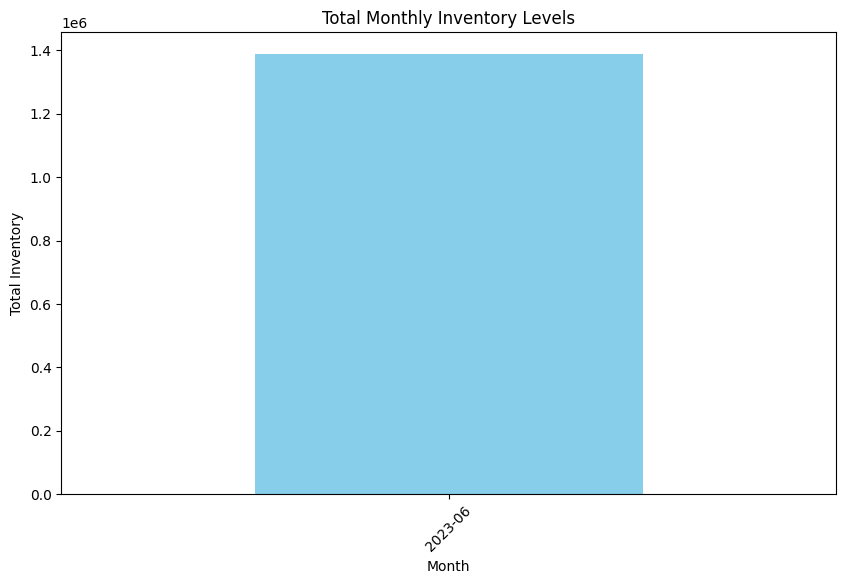

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the existing inventory data
inventory_data = pd.read_csv('/content/drive/MyDrive/krishanAI/interview/Inventory_Dataset.csv', parse_dates=['Date'], dayfirst=True)

# Display the first few rows of the inventory data
print("Original Inventory Data:")
print(inventory_data.head())

# Define future dates on a weekly basis (adjust as needed)
future_dates = pd.date_range(start='2023-06-24', end='2023-12-31', freq='W')

# Create a table showing inventory levels at different future dates for each item
future_inventory = pd.DataFrame()

for date in future_dates:
    future_inventory[date] = inventory_data[inventory_data['Date'] <= date].groupby('Item Number')['Inventory'].sum()

# Display the future inventory table
print("\nFuture Inventory Table:")
print(future_inventory)

# Save the future inventory table to a new CSV file
future_inventory.to_csv('/content/drive/MyDrive/krishanAI/interview/New_Inventory.csv')

# Create a bar chart showing total monthly inventory levels
monthly_inventory = inventory_data.groupby([inventory_data['Date'].dt.to_period("M")])['Inventory'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_inventory.plot(kind='bar', color='skyblue')
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.show()
